# Preliminary silent-sound classification analysis

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
styleSilentShot = pd.read_excel('filmStyleSilentTrimmedForPython.xlsx')
x = styleSilentShot.iloc[: , 1:-1].values # These are the predictor, independent variables (the 1:-1 excludes the first and last columns)
y = styleSilentShot.iloc[: , -1].values # These are the target variables (or classes, in this case)

In [ ]:
print(x[0,:])

['USA' 6.7 58 4.0 2.0 0 64.0 224 82 37 36 53 3]


In [ ]:
styleSilentShot.head()

,Title,COUNTRY,ASL,RA,POV,INS,INTERTIT,BCU,CU,MCU,MS,MLS,LS,VLS,Sound
0,10 Things I Hate About You,USA,6.7,58,4.0,2.0,0,64.0,224,82,37,36,53,3,1
1,"Adventures of Robin Hood, The",USA,5.0,0,0.0,0.0,0,3.0,53,71,77,109,111,76,1
2,"Affairs of Anatole, The",USA,8.0,23,16.0,9.0,159,33.0,26,89,141,136,70,5,0
3,Alexander Nevsky,RUS,7.0,0,0.0,0.0,7,1.0,61,100,58,76,186,23,1
4,Alley Cat,BRI,6.0,10,0.0,0.0,148,17.0,68,84,82,101,142,5,0


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[: , 1:]) # Only the columns containing the numerical values
x[: , 1:] = imputer.transform(x[: , 1:]) # Update the variable x
# print(x[: , 1:])

## Encoding the independent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# Print whole matrices 
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
print(x_test)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 12.0 49.0 7.0 3.0 0.0 3.0 86.0
  127.0 104.0 86.0 91.0 3.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 14.0 0.0 0.0 95.0 0.0 7.0
  27.0 74.0 123.0 243.0 26.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 14.5 0.0 0.0 0.0 55.0 0.0 3.0
  7.0 54.0 289.0 143.0 3.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 9.9 63.0 4.0 2.0 0.0 25.0 227.0
  84.0 41.0 77.0 46.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 6.8 12.0 7.0 4.0 151.0 18.0
  78.0 85.0 49.0 110.0 160.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 16.0 16.0 0.0 6.0 0.0 9.0 9.0
  34.0 70.0 134.0 233.0 11.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 8.2 12.0 12.0 12.0 94.0 40.0
  39.0 61.0 118.0 142.0 96.0 4.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 13.0 29.0 0.0 0.0 0.0 28.0
  117.0 83.0 96.0 76.0 73.0 27.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.8 49.0 0.0 0.0 0.0 25.0 176.0
  187.0 82.0 27.0 2.0 0.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 11.0 0.0 0.0 0.0 0.0 12.0 46.0
  58.0 

In [ ]:
print(y_test)

[1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler # Using standardisation, not normalisation
sc = StandardScaler()
x_train[: , 11:] = sc.fit_transform(x_train[: , 11:]) # There are 10 columns allocated to the one hot encoded country classes
x_test[: , 11:] = sc.transform(x_test[: , 11:]) # Using the same scaler (fit mean and std dev) as the training data because the test data is "unavailable"

# Logistic Regression

## Training the LR model 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression()
classifierLR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting LR Test results

In [ ]:
y_pred = classifierLR.predict(x_test)
np.set_printoptions(precision=2) # Specify the number of decimals if not a binary target variable
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # Col 1 = predictions, Col 2 = actual values

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[30  1]
 [ 1 47]]
Accuracy: 0.9746835443037974
Precision: 0.9791666666666666
Recall: 0.9791666666666666


## k-fold cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierLR, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Logistic regression cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Logistic regression cross-validation
Accuracy: 94.27 %
Standard deviation: 3.40 %


## Feature selection using wrapper

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Documentation and math http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Scoring: accuracy, f1, precision, recall, roc_auc

sfs1 = SFS(estimator = classifierLR,
           k_features = np.shape(x)[1],
           forward=True,
           scoring='accuracy',
           cv=10    
)

sfs1.fit(x_train, y_train)
sfs1.subsets_

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


{1: {'avg_score': 0.936290322580645,
  'cv_scores': array([0.94, 0.97, 0.84, 1.  , 0.87, 1.  , 0.97, 0.97, 0.9 , 0.9 ]),
  'feature_idx': (14,),
  'feature_names': ('14',)},
 2: {'avg_score': 0.9554435483870968,
  'cv_scores': array([0.94, 0.97, 0.91, 1.  , 0.9 , 0.97, 1.  , 0.97, 0.94, 0.97]),
  'feature_idx': (14, 20),
  'feature_names': ('14', '20')},
 3: {'avg_score': 0.9554435483870968,
  'cv_scores': array([0.94, 0.97, 0.91, 1.  , 0.9 , 0.97, 1.  , 0.97, 0.94, 0.97]),
  'feature_idx': (0, 14, 20),
  'feature_names': ('0', '14', '20')},
 4: {'avg_score': 0.9554435483870968,
  'cv_scores': array([0.94, 0.97, 0.91, 1.  , 0.9 , 0.97, 1.  , 0.97, 0.94, 0.97]),
  'feature_idx': (0, 2, 14, 20),
  'feature_names': ('0', '2', '14', '20')},
 5: {'avg_score': 0.9585685483870968,
  'cv_scores': array([0.94, 0.97, 0.94, 1.  , 0.9 , 0.97, 1.  , 0.97, 0.94, 0.97]),
  'feature_idx': (0, 2, 14, 15, 20),
  'feature_names': ('0', '2', '14', '15', '20')},
 6: {'avg_score': 0.9585685483870968,
  'cv_

Print the column headings of the top five features identified by the forward sequential feature selector

In [ ]:
print("This is the first row of x: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 6.7 58.0 4.0 2.0 0.0 64.0 224.0 82.0 37.0 36.0 53.0 3.0")

This is the first row of x: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 6.7 58.0 4.0 2.0 0.0 64.0 224.0 82.0 37.0 36.0 53.0 3.0


In [ ]:
feature_idx = [0, 3, 8, 14, 20] # NB: From the forward sequential feature selector

x_col = ["country", "country", "country", "country", "country", "country", "country", 
         "country", "country", 'ASL',	'RA',	'POV',	'INS',	'INTERTIT',	'BCU',	'CU',	'MCU',	'MS',	'MLS',	'LS',	'VLS']
[ x_col[i] for i in feature_idx ]

# col_names = styleSilentShot[[0, 3, 8, 14, 20] + 1]
# print(col_names)

['country', 'country', 'country', 'BCU', 'VLS']

Chech the correlation between these variables: If strong, check your model assumptions

In [ ]:
styleSilentShot[['BCU', 'VLS']].corr()

,BCU,VLS
BCU,1.00000,-0.24584
VLS,-0.24584,1.00000


# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors=5)
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifierKNN.predict(x_test)
np.set_printoptions(precision=2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[28  3]
 [ 2 46]]
Accuracy: 0.9367088607594937
Precision: 0.9387755102040817
Recall: 0.9583333333333334


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierKNN, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("kNN cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

kNN cross-validation
Accuracy: 90.46 %
Standard deviation: 4.94 %


# Linear SVM

In [ ]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel='linear')
classifierSVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifierSVM.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[30  1]
 [ 1 47]]
Accuracy: 0.9746835443037974
Precision: 0.9791666666666666
Recall: 0.9791666666666666


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierSVM, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Linear SVC cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Linear SVC cross-validation
Accuracy: 95.24 %
Standard deviation: 3.80 %


# Nonlinear SVM

## SVC

In [ ]:
from sklearn.svm import SVC
classifierSVMrbf = SVC(kernel='rbf') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
classifierSVMrbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifierSVMrbf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('SVC with kernel = rbf')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

SVC with kernel = rbf
[[29  2]
 [ 1 47]]
Accuracy: 0.9620253164556962
Precision: 0.9591836734693877
Recall: 0.9791666666666666


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierSVMrbf, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("SVC with kernel = rbf cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

SVC with kernel = rbf cross-validation
Accuracy: 94.26 %
Standard deviation: 3.71 %


### Grid search hyper-parameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, # 'Parameter' and then the [test values] (0.25 = strong regularization = less overfitting)
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
              # gamma can only be tuned in rbf, poly and sigmoid, so that's why there are two {dictionaries}
grid_search = GridSearchCV(estimator = classifierSVMrbf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, # 10-fold cross validation
                           n_jobs = -1) # if you are running the code on your machine, this will allocate all the processors to running the code
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("SVC with grid search cross-validation")
print("Best accuracy: {:.2f} %".format(best_accuracy*100)) # Format: float with two decimals
print("Best parameters:", best_parameters)

SVC with grid search cross-validation
Best accuracy: 97.77 %
Best parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'poly'}


## NuSVC

In [ ]:
from sklearn.svm import NuSVC
classifierNuSVMrbf = NuSVC(kernel='poly') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
classifierNuSVMrbf.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [ ]:
y_pred = classifierNuSVMrbf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('NuSVC with kernel = rbf')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

NuSVC with kernel = rbf
[[23  8]
 [ 1 47]]
Accuracy: 0.8860759493670886
Precision: 0.8545454545454545
Recall: 0.9791666666666666


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierNuSVMrbf, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("NuSVC with kernel = rbf cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

NuSVC with kernel = rbf cross-validation
Accuracy: 85.07 %
Standard deviation: 4.37 %


# Naive Bayes

The sklearn.naive_bayes module implements Naive Bayes algorithms. These are supervised learning methods based on applying Bayes’ theorem with strong (naive) feature independence assumptions.

## Gaussian 

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifierGNB = GaussianNB() 
classifierGNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifierGNB.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Gaussian NB')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Gaussian NB
[[30  1]
 [ 6 42]]
Accuracy: 0.9113924050632911
Precision: 0.9767441860465116
Recall: 0.875


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierGNB, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Gaussian Naive Bayes cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Gaussian Naive Bayes cross-validation
Accuracy: 87.55 %
Standard deviation: 8.74 %


# Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion='entropy') # Default is gini
classifierTree.fit(x_train, y_train)

y_pred = classifierTree.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Decision trees')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Decision trees
[[28  3]
 [ 2 46]]
Accuracy: 0.9367088607594937
Precision: 0.9387755102040817
Recall: 0.9583333333333334


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierTree, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Decision tree cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Decision tree cross-validation
Accuracy: 94.61 %
Standard deviation: 3.73 %


## Understanding the tree structure from scikit-learn

This is human-readable, but only interpretable if the variables aren't scaled

In [ ]:
n_nodes = classifierTree.tree_.node_count
children_left = classifierTree.tree_.children_left
children_right = classifierTree.tree_.children_right
feature = classifierTree.tree_.feature
threshold = classifierTree.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 23 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 14] <= -0.3110562860965729 else to node 10.
	node=1 is a split node: go to node 2 if X[:, 20] <= 2.4998127818107605 else to node 9.
		node=2 is a split node: go to node 3 if X[:, 17] <= -0.6208588778972626 else to node 8.
			node=3 is a split node: go to node 4 if X[:, 15] <= 0.684181347489357 else to node 5.
				node=4 is a leaf node.
				node=5 is a split node: go to node 6 if X[:, 11] <= -0.19767817668616772 else to node 7.
					node=6 is a leaf node.
					node=7 is a leaf node.
			node=8 is a leaf node.
		node=9 is a leaf node.
	node=10 is a split node: go to node 11 if X[:, 10] <= 6.650000095367432 else to node 22.
		node=11 is a split node: go to node 12 if X[:, 10] <= 1.5 else to node 13.
			node=12 is a leaf node.
			node=13 is a split node: go to node 14 if X[:, 12] <= 0.1018252931535244 else to node 15.
				node=14 is a leaf node.
				node=15 is a split n

## Plotting the tree

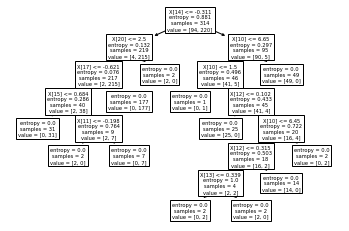

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifierTree)

plt.rcParams['figure.figsize'] = [24, 16]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
# Alt for the whole notebook: fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.show()



# Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierForest = DecisionTreeClassifier(criterion='entropy') # Default is gini
classifierForest.fit(x_train, y_train)

y_pred = classifierForest.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Random Forest')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Random Forest
[[28  3]
 [ 3 45]]
Accuracy: 0.9240506329113924
Precision: 0.9375
Recall: 0.9375


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierForest, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Random Forest cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Random Forest cross-validation
Accuracy: 94.28 %
Standard deviation: 3.09 %


# XGBoost

In [ ]:
from xgboost import XGBClassifier  # NB: xgboost library is already installed on Google Colab, will need to install it manually when working elsewhere
classifierXGB = XGBClassifier() # "ML A-Z lecture: Most of the time the default hyper parameters perform very well"
classifierXGB.fit(x_train, y_train)

y_pred = classifierForest.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('XGBoost')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

XGBoost
[[28  3]
 [ 3 45]]
Accuracy: 0.9240506329113924
Precision: 0.9375
Recall: 0.9375


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierXGB, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("XGBoost cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

XGBoost cross-validation
Accuracy: 95.53 %
Standard deviation: 3.54 %
